## Predicting Survival in the Titanic Data Set

### Decision Tree Classifier in Python using Scikit-learn

http://benalexkeen.com/decision-tree-classifier-in-python-using-scikit-learn/

The root node (the first decision node) partitions the data based on the most influential feature partitioning. There are 2 measures for this, Gini Impurity and Entropy.

Entropy
The root node (the first decision node) partitions the data using the feature that provides the most information gain.

Information gain tells us how important a given attribute of the feature vectors is.

It is calculated as:

Information Gain=entropy(parent)–[average entropy(children)]
Where entropy is a common measure of target class impurity, given as:

Entropy=Σi–pilog2pi
where i is each of the target classes.

Gini Impurity
Gini Impurity is another measure of impurity and is calculated as follows:

Gini=1–Σip2i
Gini impurity is computationally faster as it doesn’t require calculating logarithmic functions, though in reality which of the two methods is used rarely makes too much of a difference.

In [ ]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')#index_col='PassengerId' )

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df=df.set_index('PassengerId')

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

In [10]:
df.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,0,22.0,1,0,7.2500,0
2,1,1,38.0,1,0,71.2833,1
3,3,1,26.0,0,0,7.9250,1
4,1,1,35.0,1,0,53.1000,1


We need to convert ‘Sex’ into an integer value of 0 or 1.

In [9]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

We will also drop any rows with missing values.

#### You can use the isna() method then sum to count the NaN values. 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Survived    891 non-null int64
dtypes: float64(2), int64(5)
memory usage: 55.7 KB


In [11]:
df.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [14]:
df.shape

(891, 7)

In [15]:
df.size

6237

In [16]:
df.count()

Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
Survived    891
dtype: int64

In [17]:
df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

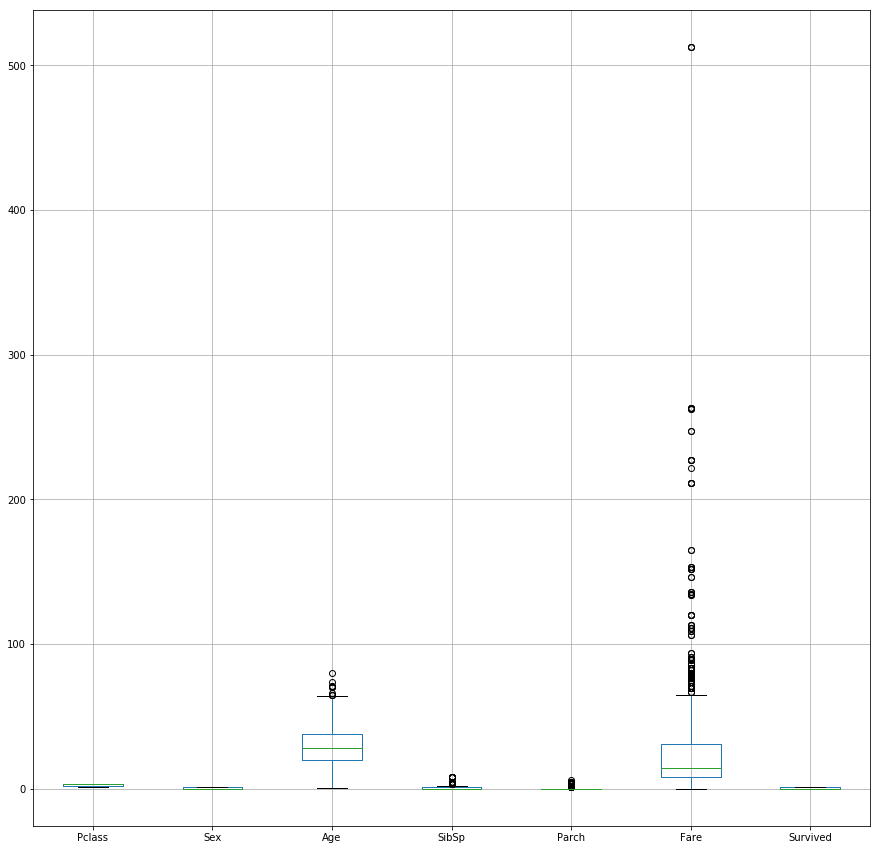

In [23]:
df.boxplot(figsize=(15,15))

In [24]:
df.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Sex,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.543351
Age,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,1.000000


We will also drop any rows with missing values.

In [36]:
df = df.dropna()

In [37]:
df.count()

Pclass      714
Sex         714
Age         714
SibSp       714
Parch       714
Fare        714
Survived    714
dtype: int64

In [38]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [39]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,0,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,3,1,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,3,0,35.0,0,0,8.0500


In [40]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

#### Train & Test Data

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [81]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')

In [82]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### First we fit our model using our training data.

In [83]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
y_predict = model.predict(X_test)

In [85]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
690,1,1,15.0,0,1,211.3375
279,3,0,7.0,4,1,29.1250
507,2,1,33.0,0,2,26.0000
10,2,1,14.0,1,0,30.0708
495,3,0,21.0,0,0,8.0500


In [86]:
y_predict 

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1])

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8268156424581006

#### We see an accuracy score of ~83.2%, which is significantly better than 50/50 guessing.

Let’s also take a look at our confusion matrix:

In [88]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,98,14
True Survival,17,50


In [89]:
98+50

148

In [90]:
148/(98+50+14+17)

0.8268156424581006

If we have graphviz installed http://www.graphviz.org/, we can export our decision tree so we can explore the decision and leaf nodes.

In [91]:
tree.export_graphviz(model.tree_, out_file='tree.dot', feature_names=X.columns)

TypeError: <sklearn.tree._tree.Tree object at 0x7f88ec30ed30> is not an estimator instance.

In [ ]:
We can then convert this dot file to a png file.

In [ ]:
from subprocess import call
call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

The root node, with the most information gain, tells us that the biggest factor in determining survival is Sex.

If we zoom in on some of the leaf nodes, we can follow some of the decisions down.

We have already zoomed into the part of the decision tree that describes males, with a ticket lower than first class, that are under the age of 10.

The impurity is the measure as given at the top by Gini, the samples are the number of observations remaining to classify and the value is the how many samples are in class 0 (Did not survive) and how many samples are in class 1 (Survived).

Let’s follow this part of the tree down, the nodes to the left are True and the nodes to the right are False:

We see that we have 19 observations left to classify: 9 did not survive and 10 did.
From this point the most information gain is how many siblings (SibSp) were aboard.
A. 9 out of the 10 samples with less than 2.5 siblings survived.
B. This leaves 10 observations left, 9 did not survive and 1 did.
6 of these children that only had one parent (Parch) aboard did not survive.
None of the children aged > 3.5 survived
Of the 2 remaining children, the one with > 4.5 siblings did not survive.

#### Decision trees are a great tool but they can often overfit the training set of data unless pruned effectively, hindering their predictive capabilities.